# Logistic Regression - Glass Type Classification

## Import Libraries

In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
from matplotlib import pyplot as plt
from sklearn import datasets
from numpy import array
from numpy import argmax 
import math
from sklearn import datasets
import seaborn as sns
#from ggplot import *
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
#from pandas_ml import ConfusionMatrix
from pandas.plotting import scatter_matrix
%matplotlib inline


## Data Set summary

To get familiar with the data set and the objective of the classification here
please see below the full Data Summary file published:
https://archive.ics.uci.edu/ml/machine-learning-databases/glass/glass.names

**Glass Types**
As per glass type and glass distribution report we have the following:

**Type of glass: (class attribute)**
- 1 building_windows_float_processed
- 2 building_windows_non_float_processed
- 3 vehicle_windows_float_processed
- 4 vehicle_windows_non_float_processed (none in this database)
- 5 containers
- 6 tableware
- 7 headlamps

**Class Distribution: (out of 214 total instances)**
- **163 Window glass** (building windows and vehicle windows)
  - 87 float processed  
    - 70 building windows
    - 17 vehicle windows
  - 76 non-float processed
    - 76 building windows
    - 0 vehicle windows
- **51 Non-window glass**
   - 13 containers
   - 9 tableware
   - 29 headlamps



### Classification objective (s)
Based on the categories above, we can classify/predict either of the following
- Predict A: **Window vs Non-window** glass OR
- Predict B: **float vs non-float** processed window


## Load the Glass Data Set

In [2]:
# For more background on the Glass Data set, have a look at the information link;
# https://archive.ics.uci.edu/ml/datasets/glass+identification
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/glass/glass.data'
col_names = ['ri','na','mg','al','si','k','ca','ba','fe','glass_type']
df = pd.read_csv(url, names=col_names)
df.head()
#df.tail()

,ri,na,mg,al,si,k,ca,ba,fe,glass_type
1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [3]:
df.shape

(214, 10)

### Predict A - Window vs Non-Window - Turn glass type into Feature

In [4]:
# glass_type 1, 2, 3 are window glass captured as "0"
# glass_type 5, 6, 7 are non-window glass captured as "1"

df['Window'] = df.glass_type.map({1:0, 2:0, 3:0, 4:0, 5:1, 6:1, 7:1})


In [5]:
df.head()

,ri,na,mg,al,si,k,ca,ba,fe,glass_type,Window
1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1,0
2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1,0
3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1,0
4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1,0
5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1,0


In [6]:
df['Window'].values

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

### Predict B - Float vs Non-Float Windows - Turn Window glass type into a new Feature

In [7]:
# Of all the Window type glasses above in A (glass type 1, 2 and 3)
# distinguish between float and non-float ones
# glass_type 1, 3 are window float glass captured as "1"
# glass_type 2, 4 are windon non-float ones captured as "0"
# glass_type 5, 6, 7 are non-window glass captured as "2"

df['Float'] = df.glass_type.map({1:1, 2:0, 3:1, 4:0, 5:2, 6:2, 7:2})
df.head()

,ri,na,mg,al,si,k,ca,ba,fe,glass_type,Window,Float
1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1,0,1
2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1,0,1
3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1,0,1
4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1,0,1
5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1,0,1


In [8]:
df['Float'].values

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int64)

iris = datasets.load_iris()
X = iris.data[:, :2]
y = (iris.target != 0) * 1

## Input vector X based on "Al" element only

In [9]:
# Selecting Independent Variables
#iv = ['al']
# Define Input vector for training
#X = df[iv].values
#np.shape(X)

## Input vector X based on multiple elements

In [10]:
# Selecting Independent Variables
iv = ['ri','mg','al','k','ca']
# Define Input vector for training
X = df[iv].values
#np.shape(X)

In [11]:
type(X)

numpy.ndarray

In [12]:
y = np.array(df[['Window']].values).reshape(-1)
np.shape(y)
#y.shape[1]

(214,)

In [13]:
type(y)

numpy.ndarray

Text(0, 0.5, 'Window vs Non-Window')

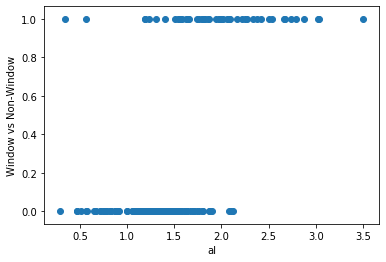

In [14]:
plt.scatter(df.al, df.Window)
plt.xlabel('al')
plt.ylabel('Window vs Non-Window')

## Split X and y into Test and Training Data Sets

from sklearn.model_selection import train_test_split
X_train, X_test, y_tr, y_tst = train_test_split(df[['al']],df.Window,train_size=0.7, test_size=0.3)

type(X_train)
np.shape(X_train)

In [15]:
#np.shape(y_train)

# Plot functions

In [16]:
def plot_scatter(X, y):
    plt.figure(figsize=(10, 6))
    plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='b', label='0')
    plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='r', label='1')
    plt.legend();

In [17]:
def plot_withline(X,y,SPNN):
    plt.figure(figsize=(10, 6))
    plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='b', label='0')
    plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='r', label='1')
    plt.legend()
    x1_min, x1_max = X[:,0].min(), X[:,0].max(),
    x2_min, x2_max = X[:,1].min(), X[:,1].max(),
    xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max), np.linspace(x2_min, x2_max))
    grid = np.c_[xx1.ravel(), xx2.ravel()]
    probs = SPNN.classify(grid).reshape(xx1.shape)
    plt.contour(xx1, xx2, probs, [0.5], linewidths=1, colors='black');

# Define Functions

In [18]:
class LogisticRegressionSinglePerceptronModel(object):
    def __init__(self, eta, inputL, outputL):

        # Define NN structure parameters
        self.inputLayer = inputL
        self.outputLayer = outputL
        self.eta = eta
        
        # Initialise random weights based on NN structure
        # self.w = np.random.random((self.inputLayer, self.outputLayer))
        self.w = np.random.random(self.inputLayer)
        
        # Initialise with bias column
        # self.w = np.random.random((self.inputLayer+1, self.outputLayer))
        
        # Initialise Weights Learning lists to keep track of weights learning curve
        self.w_list = []
        self.w_curve = []

        # Initialise Error list to keep track of Error learning curve
        self.E = []
    
    # Function to add the bias term of ones to the input (Bias or Intercept)
    def add_bias(self, X):
        bias = np.ones((X.shape[0], 1))
        return np.concatenate((bias, X), axis=1)
    
    
    def sigmoidplus(self, x, derivative=False):
        if derivative:
            return x * (1 - x)
        return 1 / (1 + np.exp(-x))
    
    
    
    # Defining the Cost function J(θ) (or else the Error)
    # using the Cross Entropy function
    def error(self,h, y):
        error = (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()
        self.E = np.append(self.E, error)
                       
    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))
    
    def feedforward(self,X):
        #X = self.add_bias(X)
        z = np.dot(X, self.w)
        h = self.sigmoid(z)
        return(h)
      
    
        # Backpropagation for Single Perceptron using chain rule
        # dJ/dθ = dJ/dh * dh/dz * dz/dθ
        #          (1)     (2)     (3)
        #
        # Term (1) - dJ/dh
        # dJ/dh: Partial derivative of the cost function J(Θ) towards h 
        #        (derived manually using simple derivatives rules)
        #        (y-h) / (h*(1-h))
        #
        # Term (2) - dh/dz 
        # dh/dz: Derivative of Activation function (Sigmoid here)
        #        h*(1-h)
        # 
        # Term (3) - dz/dw
        # dz/dθ: Input X
        # 
        # Final Result: dJ/dθ = (y-h)*X
        
    def backprop(self,X,y,h):
        self.delta_E_w = np.dot(X.T,h-y) / self.outputLayer
        
        # Store All weights throughout learning
        self.w_list.append(self.w)
        
        # Adjust weights
        self.w = self.w - eta * self.delta_E_w
        
    def returnWeights(self):
        return self.w
        
    def train(self,X,y):
        for epoch in range(epochs):
            # Forward pass
            h = self.feedforward(X)
                        
            # Backpropagation - Calculate Weight adjustments and update weights
            self.backprop(X,y,h)
            
            # Calculate error based on the Cross Entropy Loss function
            self.error(h, y)
               
    def plot(self):
        fig = plt.figure()
        plt.plot(self.E)
        
        fig.suptitle('Error', fontsize=16)
        plt.xlabel('Epochs', fontsize=12)
        plt.ylabel('Error achieved', fontsize=12)
        
        plt.show()
    
    def predict(self, X):
        # Forward pass
        pred = self.feedforward(X)
        return pred
    
    def classify(self, y):
        return self.predict(y).round()
        

In [19]:
#plot_scatter(X,y)

Text(0, 0.5, 'Window vs Non-Window')

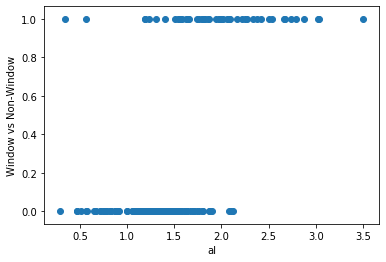

In [20]:
plt.scatter(df.al, df.Window)
plt.xlabel('al')
plt.ylabel('Window vs Non-Window')

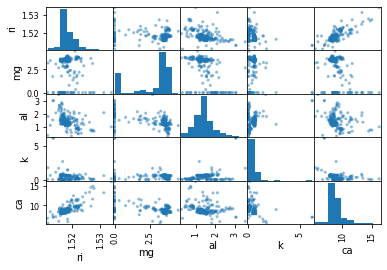

In [21]:
scatter_matrix(df[iv])
plt.show()

# Define Parameters

In [22]:
# Learning Rate
eta = 0.001

# Number of epochs for learning
epochs = 10000

# Input layer
inputLayer = X.shape[1]

# Output Layer
outputLayer = 1

# Single Perceptron NN Training

Wall time: 1.03 s


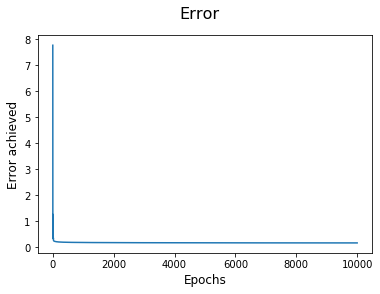

Minimum Error achieved: 0.15296884309337855


array([ 6.94762653, -2.43534018,  3.074623  , -1.22191025, -1.10535865])

In [23]:
# Initiate Single Perceptron NN
SPNN = LogisticRegressionSinglePerceptronModel(eta, inputLayer, outputLayer)

# Train SPNN for Linear Regression Model
#%time SPNN.train(X_train, y_train)



%time SPNN.train(X, y)

# Plot Error
SPNN.plot()

# Predict output based on test set
pred = SPNN.predict(X)

# Generate classified output
pred2 = SPNN.classify(X)

# Assess Model accuracy
print("Minimum Error achieved:", min(SPNN.E)) 

# SPNN weights
SPNN.w

# Visualisation prediction line
#plot_withline(X,y,SPNN)
# Plot Predictions
#plt.plot(X,pred)

In [24]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [25]:
pred2.astype(int)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [26]:
# Comparing real ouput y with predicted output
[y, pred2.astype(int)]

[array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

# Create a seperate table to store predictions
glass_df = X
glass_df['household_actual'] = y

# Plot logistic regression line 
sns.regplot(X='al', y='household_actual', data=glass_df, logistic=True, color='g')

In [27]:
from sklearn import metrics
# Print Confusion Matrix
print (metrics.confusion_matrix(y, pred2))

[[157   6]
 [  9  42]]


In [28]:
print (metrics.classification_report(y, pred2))

              precision    recall  f1-score   support

           0       0.95      0.96      0.95       163
           1       0.88      0.82      0.85        51

    accuracy                           0.93       214
   macro avg       0.91      0.89      0.90       214
weighted avg       0.93      0.93      0.93       214

